Tarea 5 
Proyecto Análisis de Datos 


Regreción Logistica 

Estudiante : Dalia Dominguez Rodriguez

curso 
Analisis de Datos


1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 

In [1]:
#carga de las librerias
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y el analisis de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt #creacion de graficos en dos dimenciones 

# libreias implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#lectura de datos en python cargar variable BD
BD = pd.read_csv('Titanic-Dataset.csv')


In [3]:
#lectura de datos 
BD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para poder entrenar el modelo debemos eliminar los conjuntos de cadenas de texto.

In [4]:
# Eliminar la columna "Name"
BD = BD.drop('Name', axis=1)


In [5]:
# Eliminar la columna "Ticket"
BD = BD.drop('Ticket', axis=1)

In [6]:
# Eliminar la columna "Embarked"
BD = BD.drop('Embarked', axis=1)

In [7]:
# Eliminar la columna "Sex"
BD = BD.drop('Sex', axis=1)

In [8]:
# Eliminar la columna "Cabin"
BD = BD.drop('Cabin', axis=1)

In [9]:
#lectura de datos 
BD.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [10]:
# mirara tamaño de la BD
BD.shape

(891, 7)

In [11]:
#descripcion de los datos
BD.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#mirar cantidad de valores nulos
BD.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

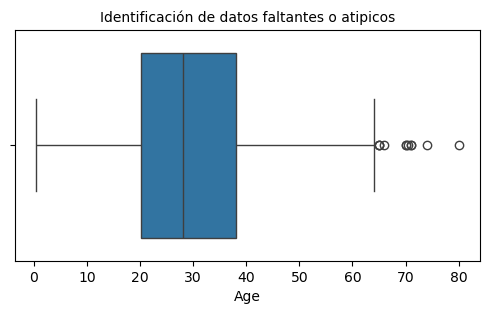

In [13]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Age'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

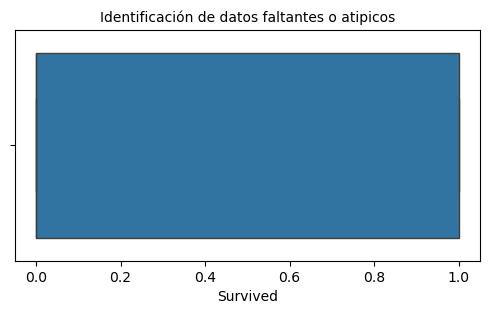

In [14]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Survived'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

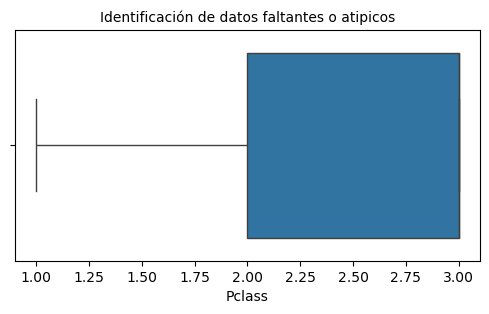

In [15]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Pclass'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

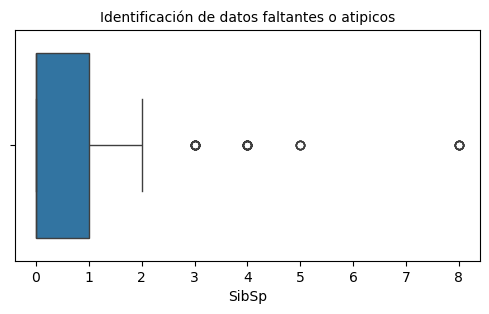

In [16]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['SibSp'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

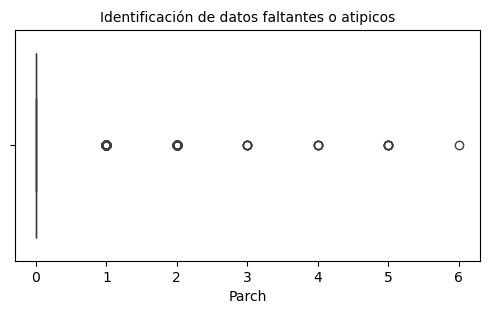

In [17]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Parch'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

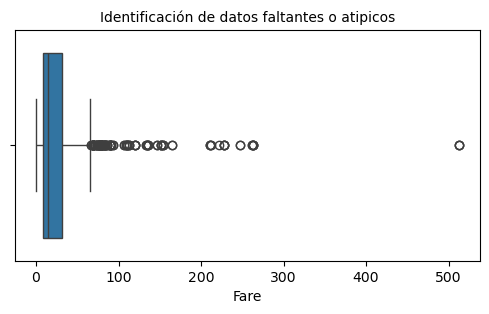

In [18]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Fare'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

In [19]:
print("Cantidad de Registros con cero en age",BD['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps",BD['Pclass'].isin([0]).sum())


Cantidad de Registros con cero en age 0
Cantidad de Registros con cero en trestbps 0


In [20]:
#conteo de datos atipicos
nivel_minimo=1
nivel_maximo=90
Total_Atipicos=((BD['Age']<nivel_minimo)|(BD['Age']>nivel_maximo)).sum()
print("el total de datos atipicos es{}".format(Total_Atipicos))

el total de datos atipicos es7


In [21]:
nivel_minimo=0
nivel_maximo=1
Total_Atipicos=((BD['Survived']<nivel_minimo)|(BD['Survived']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [22]:
nivel_minimo=1
nivel_maximo=3
Total_Atipicos=((BD['Pclass']<nivel_minimo)|(BD['Pclass']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [23]:
nivel_minimo=0
nivel_maximo=8
Total_Atipicos=((BD['SibSp']<nivel_minimo)|(BD['SibSp']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [24]:
nivel_minimo=0
nivel_maximo=6
Total_Atipicos=((BD['Parch']<nivel_minimo)|(BD['Parch']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [25]:
nivel_minimo=0
nivel_maximo=300
Total_Atipicos=((BD['Fare']<nivel_minimo)|(BD['Fare']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 3


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [26]:
#filtrar datos atipicos 
BD=BD[(BD['Age']<nivel_maximo)&(BD['Age']>nivel_minimo)]

In [27]:
#Verificar 
nivel_minimo=1
nivel_maximo=90
Total_Atipicos=((BD['Age']<nivel_minimo)|(BD['Age']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 7


In [28]:
#filtrar datos atipicos 
BD=BD[(BD['Fare']<nivel_maximo)&(BD['Fare']>nivel_minimo)]

In [29]:
#Verificar
nivel_minimo=0
nivel_maximo=300
Total_Atipicos=((BD['Fare']<nivel_minimo)|(BD['Fare']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [30]:
#revicion de tipos de datos 
BD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  651 non-null    int64  
 1   Survived     651 non-null    int64  
 2   Pclass       651 non-null    int64  
 3   Age          651 non-null    float64
 4   SibSp        651 non-null    int64  
 5   Parch        651 non-null    int64  
 6   Fare         651 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 40.7 KB


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 

In [31]:
#Determinar si una persona si tiene una enfermedad cardiaca o no.
#total de personas con enfermedad cardiaca 
BD['Survived'].value_counts()

Survived
0    405
1    246
Name: count, dtype: int64

In [32]:
BD[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [33]:
BD.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [34]:
# mirara tamaño de la BD
BD.shape

(651, 7)

4. Dividir el dataset en Train y Test para evaluar correctamente

In [35]:
#Dividir el dataset en Train y Test para evaluar correctamente (train)=75%, ypara prueba (test)=25%
#se crean variables x y Y

x=BD.drop('Survived',axis=1)#se cargan los datos de train sin los datos de la columna 
y=BD['Survived']#se cargan los datos de train con los datos de la columna
# crear divicion de conjuntos de datos 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)


5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [36]:
#Construir el modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = 'liblinear') # liblinear es una libreria
modelo_regresion.fit (x_train, y_train)


LogisticRegression(solver='liblinear')

In [37]:
# crear modelo de prediccion 
prediccion = modelo_regresion.predict(x_test) # la funcion predict predice los valores

In [38]:
print (y_test)

308    0
452    0
652    0
663    0
479    1
      ..
220    1
232    0
445    1
139    0
860    0
Name: Survived, Length: 163, dtype: int64


6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [39]:
# desempeño del modelo
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       101
           1       0.63      0.42      0.50        62

    accuracy                           0.69       163
   macro avg       0.67      0.64      0.64       163
weighted avg       0.68      0.69      0.67       163



7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

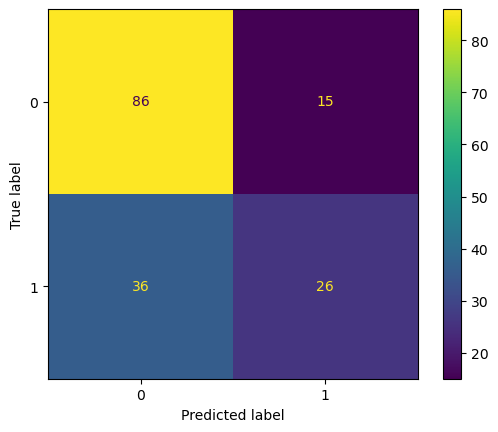

In [40]:
#  matrix de confucion 


cm=confusion_matrix(y_test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

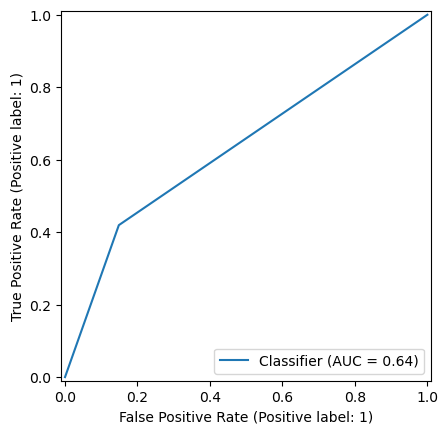

In [41]:
#curva de precision del modelo 
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos.

1. las predicciones positivas verdaderas son del 0,63, lo que significa que el 63% de las predichos que sobrevivieron son verdaderos
2. Recall el modelo identifico correctamente el 42% de todos los sobrevivientes
3. F1 Score: el equilibrio de precicion y Rcall es del 50%
   Matris de confucion
1. Verdaderos negativos: el recuento de clasificaciones predijo correctamente como falso 86
2. verdaderos positivos: el recuento de clasificaciones predijo correctamente como verdadero 26
3. Falsos positivos:el recuento de clasificaciones predijo incorrectamente como verdadero 36
4. Falsos negativos:el recuento de clasificaciones predijo incorrectamente como falso 15
  
